In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
df_final = pd.read_csv('../Data/df_final.csv', index_col="time")

In [58]:
X = df_final.drop(columns=['generation solar','generation wind onshore', 'forecast wind onshore day ahead', 'forecast solar day ahead'])
y_solar = df_final['generation solar']
y_wind = df_final['generation wind onshore']

In [59]:
def split_by_date(X,train_end_date):
    if not isinstance(train_end_date, pd.Timestamp):
        train_end_date = pd.Timestamp(train_end_date)

    # Convert index of X and y to Timestamp objects if they are strings
    if isinstance(X.index[0], str):
        X.index = pd.to_datetime(X.index)
        
    X_train = X[X.index <= train_end_date]
    X_test = X[X.index > train_end_date]
    
    return X_train, X_test

train_end_date = pd.to_datetime('2017-12-31 23:00:00+00:00')
X_train, X_test = split_by_date(X,train_end_date)
y_solar_train,y_solar_test = split_by_date(y_solar,train_end_date)

# Standardize all columns except target
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)


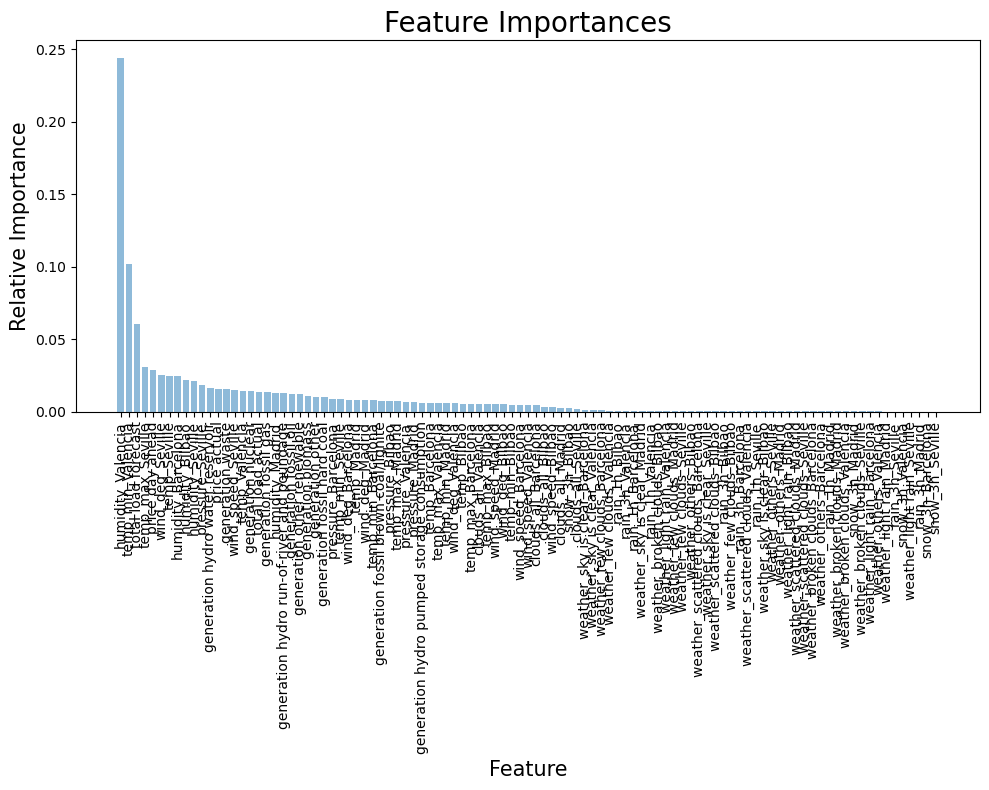

In [60]:
# Instantiate the regressor with desired parameters
regressor_solar = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to your training data
regressor_solar.fit(X_train, y_solar_train)

# Predict using the trained regressor
predictions_solar = regressor_solar.predict(X_test)

# Assuming rf is your trained RandomForestClassifier
feature_importances = regressor_solar.feature_importances_

# Adjusting feature_names to match your processed 'carseats' DataFrame
# Ensure this line comes after all preprocessing steps, including get_dummies and drop
feature_names = X_train.columns

# Sort the feature importances in descending order and get their indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Create the plot
plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=20)
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', alpha=0.5)
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

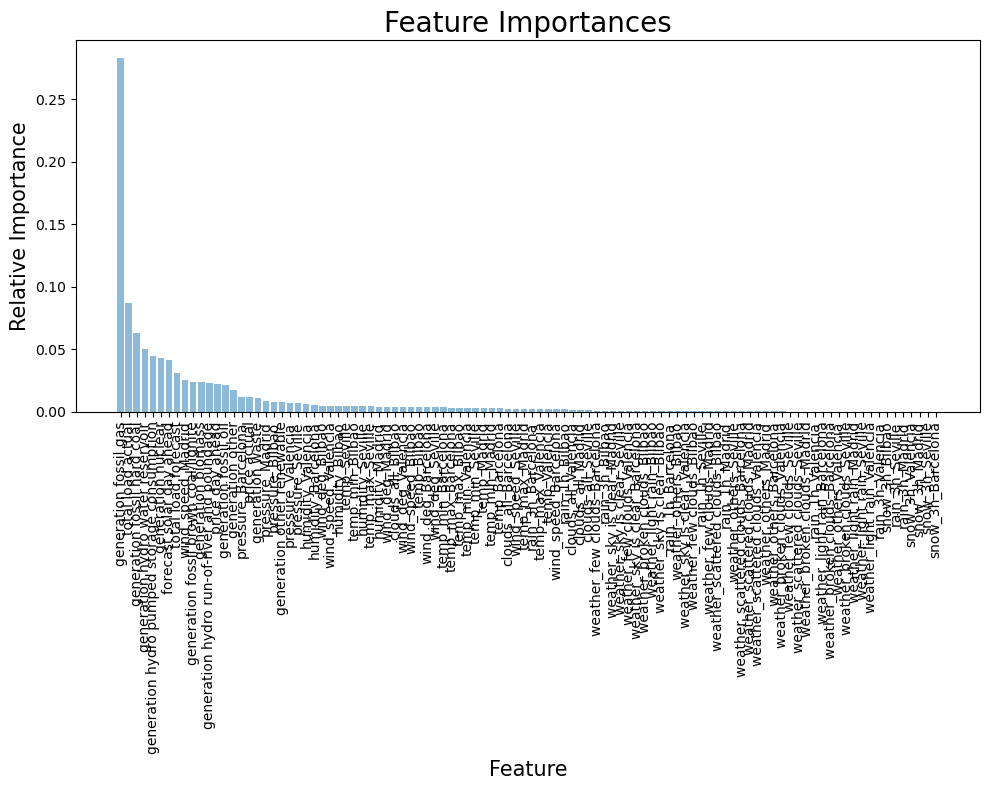

In [56]:
# Instantiate the regressor with desired parameters
regressor_wind = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to your training data
regressor_wind.fit(X_train, y_wind_train)

# Predict using the trained regressor
predictions_wind = regressor_wind.predict(X_test)

# Assuming rf is your trained RandomForestClassifier
feature_importances =regressor_wind.feature_importances_

# Adjusting feature_names to match your processed 'carseats' DataFrame
# Ensure this line comes after all preprocessing steps, including get_dummies and drop
feature_names = X_train.columns

# Sort the feature importances in descending order and get their indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Create the plot
plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=20)
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', alpha=0.5)
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()